# Copy UCSB MINISEED data to asdf database

- Creates single asdf files for each pad and sensor;
  and creates an overall asdf content file called `data/UCSB_seis_inf/seis_inf.asdf`.
- Raw data is cropped to 20 s windows around each blast, starting at trigger signal.
- Time arrays are created for each blast with t=0s at trigger time.

In [1]:
import numpy as np
import asdf
import pandas as pd
import obspy
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=15)
plt.rc('figure', figsize=(12, 9))

**Currently, only the ascii data has been copied over to asdf**

In [2]:
folder = Path("../data/UCSB_seis_inf/")
folder

PosixPath('../data/UCSB_seis_inf')

In [3]:
# af = asdf.AsdfFile()
# af.write_to('../data/UCSB_seis_inf/asdf/seis_inf.asdf')
af = asdf.open(folder / 'asdf/seis_inf.asdf', mode='rw')

In [4]:
srate = 400.

## Pad 1

In [5]:
pad = 1
stationmap = {
    'seis': {f'NYS0{i}': i for i in range(1, 8)},
    'inf': {f'NYI{i}': i for i in range(1, 4)}
}
raw = {
    'seis': {i: {} for i in range(1, 8)},
    'inf': {i: {} for i in range(1, 4)}
}

In [6]:
for station, i in stationmap['seis'].items():
    raw['seis'][i]['hhe'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.1.HHE.2018.207.13")
    )
    raw['seis'][i]['hhn'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.2.HHN.2018.207.13")
    )
    raw['seis'][i]['hhz'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.3.HHZ.2018.207.13")
    )
for station, i in stationmap['inf'].items():
    for k in range(1, 4):
        raw['inf'][i][k] = obspy.read(
            str(folder / f"DATA/MINISEED/{station}/X6.{station}.{i}.DDF.2018.207.13")
        )

In [7]:
p1 = {
    't=0': '2018-07-26 09:55:25.294',
    'trigger': '0.',
    'ascii_off': 1.8025
}

In [8]:
tstart = 55 * 60 + 25.294
tend = tstart + 20
start = int(round(tstart * srate))
end = int(round(tend * srate))
start, end

(1330118, 1338118)

In [9]:
t = np.arange(0, end - start, dtype=float) / srate
p1['t'] = t

In [10]:
p1['seis'] = {i: {} for i in range(1, 8)}
for i, val in raw['seis'].items():
    p1['seis'][i]['hhe'] = val['hhe'][0][start:end]
    p1['seis'][i]['hhn'] = val['hhn'][0][start:end]
    p1['seis'][i]['hhz'] = val['hhz'][0][start:end]
p1['inf'] = {i: {} for i in range(1, 4)}
for i, val in raw['inf'].items():
    for k, vval in val.items():
        p1['inf'][i][k] = vval[0][start:end]

### Compare to ascii data to get time shift

In [11]:
aseis = pd.read_csv(
    folder / 'DATA/DATA_ASCII_amp/BLAST1/VEL/HHZ/BUF.NYS01.HHZ.txt',
    sep='\s+', names=['hhz'], index_col=0
)
aseis.head(2)

hhz
0.0000  0.000000
0.0025 -0.000101

In [12]:
δt = 2.7950 - .9925
δt

1.8024999999999998

In [13]:
p1['ascii_off'] = 1.8025

(0.7, 7.0)

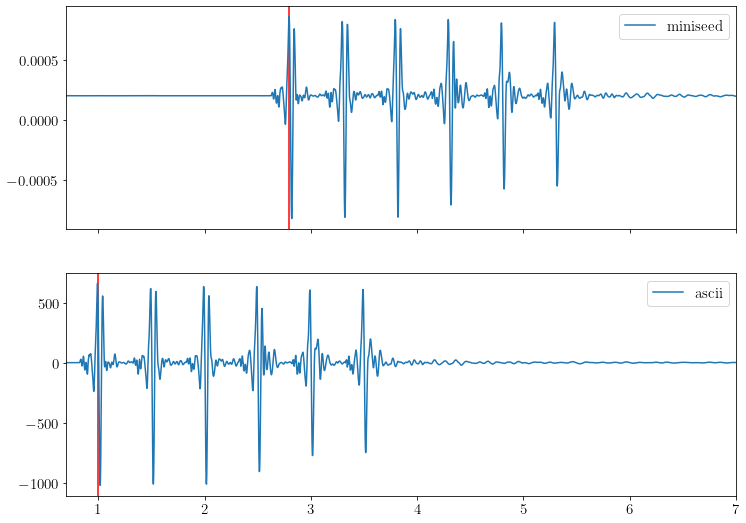

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(t, p1['seis'][1]['hhz'], label='miniseed')
ax1.legend(loc='upper right')
ax1.axvline(2.795, color='red', zorder=-1)
ax2.plot(aseis.index, aseis.hhz, label='ascii')
ax2.axvline(0.9925, color='red', zorder=-1)
ax2.legend(loc='upper right')
ax2.set_xlim(.7, 7.)
# fig

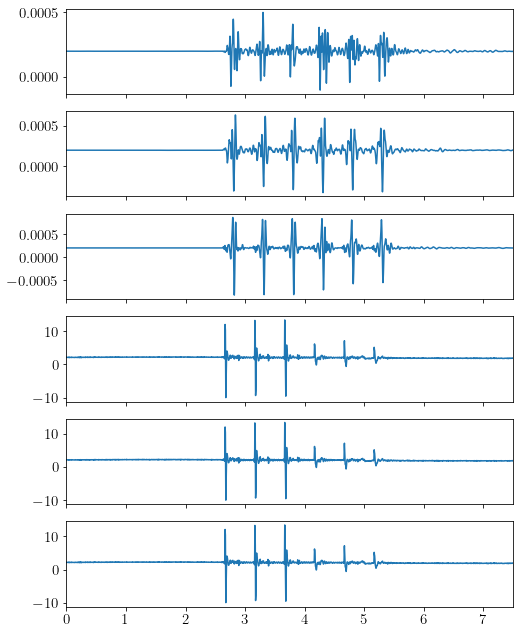

In [15]:
fig, axs = plt.subplots(nrows=6, sharex=True)

for k, ax in zip(['hhe', 'hhn', 'hhz'], axs[:3]):
    ax.plot(t, p1['seis'][1][k])
for k, ax in zip([1, 2, 3], axs[3:]):
    ax.plot(t, p1['inf'][1][k])

ax.set_xlim(0, 7.5)

fig.set_size_inches(8, 11)
# fig

## Pad 2

In [16]:
pad = 2
raw = {'seis': {i: {} for i in range(1, 8)},
       'inf': {i: {} for i in range(1, 4)}}

In [17]:
for station, i in stationmap['seis'].items():
    raw['seis'][i]['hhe'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.1.HHE.2018.207.15")
    )
    raw['seis'][i]['hhn'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.2.HHN.2018.207.15")
    )
    raw['seis'][i]['hhz'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.3.HHZ.2018.207.15")
    )
for station, i in stationmap['inf'].items():
    for k in range(1, 4):
        raw['inf'][i][k] = obspy.read(
            str(folder / f"DATA/MINISEED/{station}/X6.{station}.{k}.DDF.2018.207.15")
        )

In [18]:
tstart = 23 * 60 + 6.545
tend = tstart + 20
start = int(round(tstart * srate))
end = int(round(tend * srate))
start, end

(554618, 562618)

In [19]:
t = np.arange(0, end - start, dtype=float) / srate

p2 = {
    't=0': '2018-07-26 11:23:06.545',
    'trigger': '0.',
    't': t,
    't_off': 3.4250
}

### Compare to ascii data to get time shift

In [20]:
stationmap['seis'].items()

dict_items([('NYS01', 1), ('NYS02', 2), ('NYS03', 3), ('NYS04', 4), ('NYS05', 5), ('NYS06', 6), ('NYS07', 7)])

In [21]:
raw['seis'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7])

In [22]:
p2['seis'] = {i: {} for i in range(1, 8)}
for i, val in raw['seis'].items():
    p2['seis'][i]['hhe'] = val['hhe'][0][start:end]
    p2['seis'][i]['hhn'] = val['hhn'][0][start:end]
    p2['seis'][i]['hhz'] = val['hhz'][0][start:end]
p2['inf'] = {i: {} for i in range(1, 4)}
for i, val in raw['inf'].items():
    for k, vval in val.items():
        p2['inf'][i][k] = vval[0][start:end]

In [23]:
aseis = pd.read_csv(
    folder / 'DATA/DATA_ASCII_amp/BLAST2/VEL/HHZ/BUF.NYS01.HHZ.txt',
    sep='\s+', names=['hhz'], index_col=0
)
aseis.head(2)

hhz
0.0000  0.000000
0.0025  0.000081

In [24]:
δt = 4.4200 - .9950
δt

3.425

In [25]:
p2['ascii_off'] = 3.4250

(0.7, 7.5)

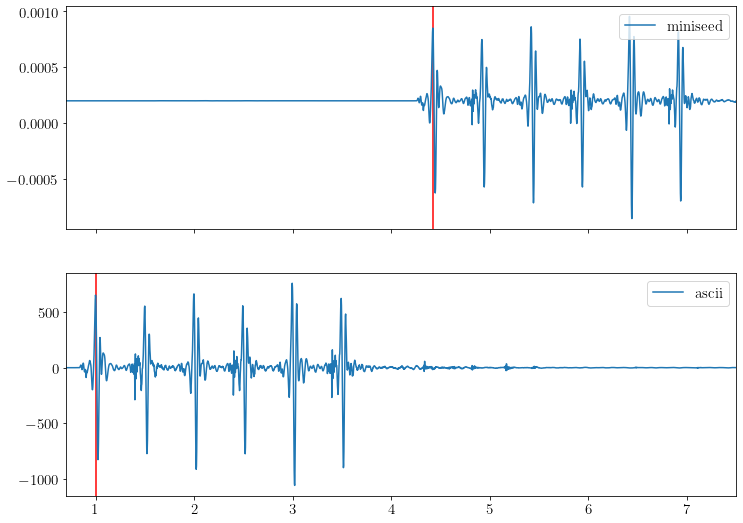

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(t, p2['seis'][1]['hhz'], label='miniseed')
ax1.legend(loc='upper right')
ax1.axvline(4.42, color='red', zorder=-1)
ax2.plot(aseis.index, aseis.hhz, label='ascii')
ax2.axvline(0.995, color='red', zorder=-1)
ax2.legend(loc='upper right')
ax2.set_xlim(.7, 7.5)
# fig

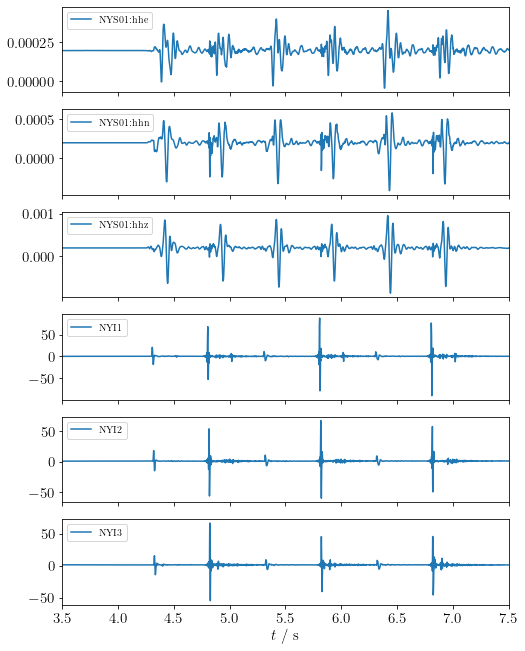

In [27]:
fig, axs = plt.subplots(nrows=6, sharex=True)
for k, ax in zip(['hhe', 'hhn', 'hhz'], axs[:3]):
    ax.plot(t, p2['seis'][1][k], label=f"NYS01:{k}")
    ax.legend(loc='upper left', fontsize=10)
for k, ax in zip([1, 2, 3], axs[3:]):
    ax.plot(t, p2['inf'][1][k], label=f"NYI{k}")
    ax.legend(loc='upper left', fontsize=10)
ax.set_xlim(3.5, 7.5)
ax.set_xlabel(r'$t\ /\ \mathrm{s}$')
fig.set_size_inches(8, 11)
# fig

## Pad 3

In [28]:
pad = 3
raw = {'seis': {i: {} for i in range(1, 8)},
       'inf': {i: {} for i in range(1, 4)}}

In [29]:
for station, i in stationmap['seis'].items():
    raw['seis'][i]['hhe'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.1.HHE.2018.207.17")
    )
    raw['seis'][i]['hhn'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.2.HHN.2018.207.17")
    )
    raw['seis'][i]['hhz'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.3.HHZ.2018.207.17")
    )
for station, i in stationmap['inf'].items():
    for k in range(1, 4):
        raw['inf'][i][k] = obspy.read(
            str(folder / f"DATA/MINISEED/{station}/X6.{station}.{k}.DDF.2018.207.17")
        )

In [30]:
tstart = 50 * 60 + 53.644
tend = tstart + 20
start = int(round(tstart * srate))
end = int(round(tend * srate))
start, end

(1221458, 1229458)

In [31]:
t = np.arange(0, end - start, dtype=float) / srate

p3 = {
    't=0': '2018-07-26 13:50:53.644',
    'trigger': '0.',
    't': t
}

In [32]:
p3['seis'] = {i: {} for i in range(1, 8)}
for i, val in raw['seis'].items():
    p3['seis'][i]['hhe'] = val['hhe'][0][start:end]
    p3['seis'][i]['hhn'] = val['hhn'][0][start:end]
    p3['seis'][i]['hhz'] = val['hhz'][0][start:end]
p3['inf'] = {i: {} for i in range(1, 4)}
for i, val in raw['inf'].items():
    for k, vval in val.items():
        p3['inf'][i][k] = vval[0][start:end]

### Compare to ascii data to get time shift

In [33]:
aseis = pd.read_csv(
    folder / 'DATA/DATA_ASCII_amp/BLAST3/VEL/HHZ/BUF.NYS01.HHZ.txt',
    sep='\s+', names=['hhz'], index_col=0
)
aseis.head(2)

hhz
0.0000  0.000000
0.0025 -0.000026

In [34]:
δt = 7.9825 - .9975
δt

6.984999999999999

In [35]:
p3['ascii_off'] = 6.9850

(0.7, 11.0)

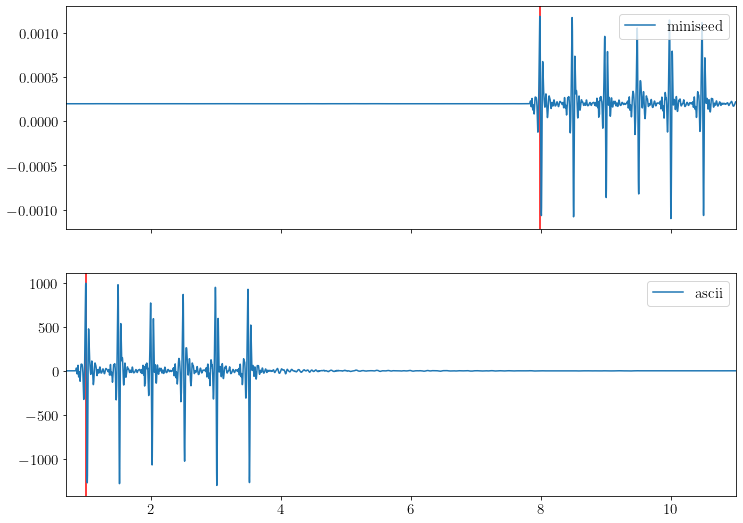

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(t, p3['seis'][1]['hhz'], label='miniseed')
ax1.legend(loc='upper right')
ax1.axvline(7.9825, color='red', zorder=-1)
ax2.plot(aseis.index, aseis.hhz, label='ascii')
ax2.axvline(0.9975, color='red', zorder=-1)
ax2.legend(loc='upper right')
ax2.set_xlim(.7, 11)
# fig

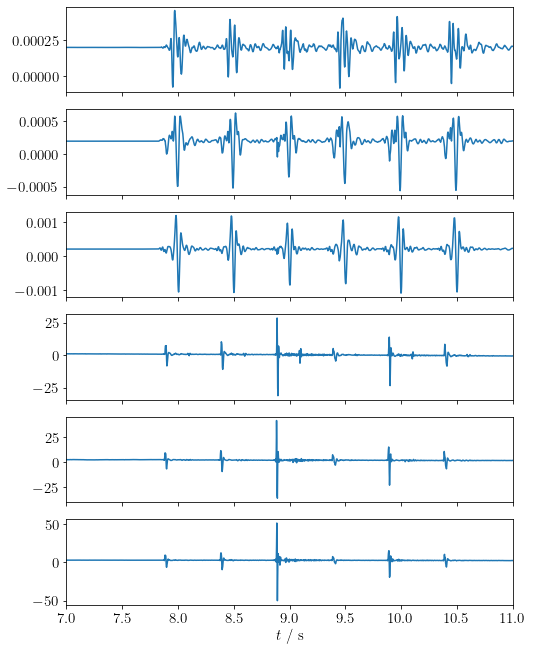

In [37]:
fig, axs = plt.subplots(nrows=6, sharex=True)
for k, ax in zip(['hhe', 'hhn', 'hhz'], axs[:3]):
    ax.plot(t, p3['seis'][1][k])
for k, ax in zip([1, 2, 3], axs[3:]):
    ax.plot(t, p3['inf'][1][k])
ax.set_xlim(7, 11)
ax.set_xlabel(r'$t\ /\ \mathrm{s}$')
fig.set_size_inches(8, 11)
# fig

## Pad 4

In [38]:
pad = 4
raw = {'seis': {i: {} for i in range(1, 8)},
       'inf': {i: {} for i in range(1, 4)}}

In [39]:
for station, i in stationmap['seis'].items():
    raw['seis'][i]['hhe'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.1.HHE.2018.207.19")
    )
    raw['seis'][i]['hhn'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.2.HHN.2018.207.19")
    )
    raw['seis'][i]['hhz'] = obspy.read(
        str(folder / f"DATA/MINISEED/{station}/X6.{station}.3.HHZ.2018.207.19")
    )
for station, i in stationmap['inf'].items():
    for k in range(1, 4):
        raw['inf'][i][k] = obspy.read(
            str(folder / f"DATA/MINISEED/{station}/X6.{station}.{k}.DDF.2018.207.19")
        )

In [40]:
tstart = 31 * 60 + 8.295
tend = tstart + 20
start = int(round(tstart * srate))
end = int(round(tend * srate))
start, end

(747318, 755318)

In [41]:
t = np.arange(0, end - start, dtype=float) / srate

p4 = {
    't=0': '2018-07-26 15:31:08.295',
    'trigger': '0.',
    't': t
}

In [42]:
p4['seis'] = {i: {} for i in range(1, 8)}
for i, val in raw['seis'].items():
    p4['seis'][i]['hhe'] = val['hhe'][0][start:end]
    p4['seis'][i]['hhn'] = val['hhn'][0][start:end]
    p4['seis'][i]['hhz'] = val['hhz'][0][start:end]
p4['inf'] = {i: {} for i in range(1, 4)}
for i, val in raw['inf'].items():
    for k, vval in val.items():
        p4['inf'][i][k] = vval[0][start:end]

### Compare to ascii data to get time shift

In [43]:
aseis = pd.read_csv(
    folder / 'DATA/DATA_ASCII_amp/BLAST4/VEL/HHZ/BUF.NYS01.HHZ.txt',
    sep='\s+', names=['hhz'], index_col=0
)
aseis.head(2)

hhz
0.0000  0.000000
0.0025  0.000066

In [44]:
δt = 3.680 - .9975
δt

2.6825

In [45]:
p4['ascii_off'] = 2.68250

(0.7, 7.5)

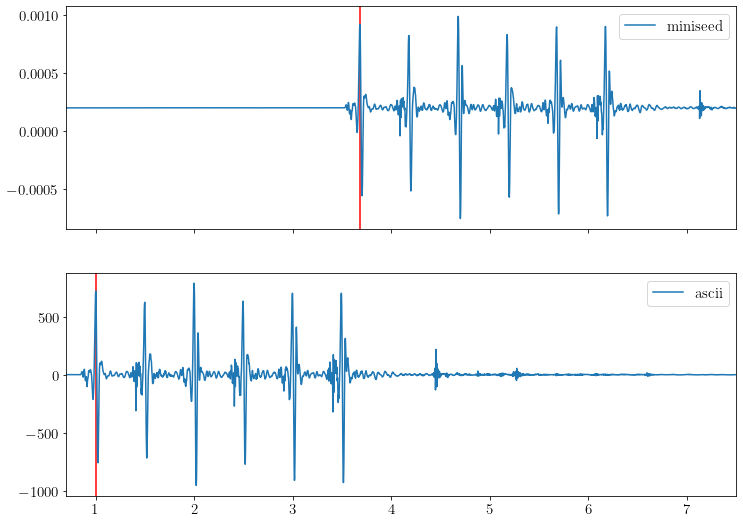

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(t, p4['seis'][1]['hhz'], label='miniseed')
ax1.legend(loc='upper right')
ax1.axvline(3.680, color='red', zorder=-1)
ax2.plot(aseis.index, aseis.hhz, label='ascii')
ax2.axvline(0.9975, color='red', zorder=-1)
ax2.legend(loc='upper right')
ax2.set_xlim(.7, 7.5)
# fig

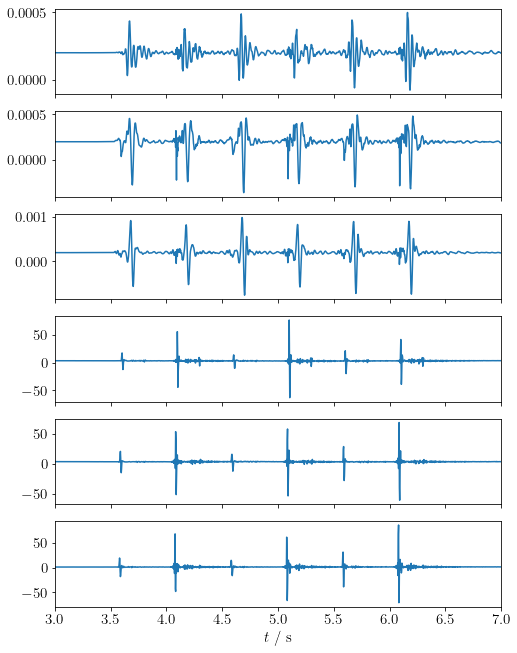

In [47]:
fig, axs = plt.subplots(nrows=6, sharex=True)
for k, ax in zip(['hhe', 'hhn', 'hhz'], axs[:3]):
    ax.plot(t, p4['seis'][1][k])
for k, ax in zip([1, 2, 3], axs[3:]):
    ax.plot(t, p4['inf'][1][k])
ax.set_xlim(3, 7)
ax.set_xlabel(r'$t\ /\ \mathrm{s}$')
fig.set_size_inches(8, 11)
# fig

In [48]:
folder

PosixPath('../data/UCSB_seis_inf')

In [49]:
def getel(dct, key):
    try:
        ret = dct[key]
    except KeyError:
        dct[key] = {}
        ret = dct[key]
    return ret

In [50]:
for pad, dta in zip([f'pad{i}' for i in range(1, 5)],
                    [p1, p2, p3, p4]):
    print(pad, '  t', sep='\n')
    afpad = getel(af, pad)
    afpad['ascii_off'] = dta['ascii_off']
    ttarget = asdf.AsdfFile(
        tree={'start_time': dta['t=0'], 't': dta['t'], 'units': 's'}
    )
    name = f'ucsb_{pad}_t.asdf'
    ttarget.write_to(folder / f'asdf/{name}', all_array_compression='zlib')
    afpad['t'] = ttarget.make_reference(['t'])
    afseis = getel(afpad, 'seis')
    print('  seis', end='...  ')
    for station, i in stationmap['seis'].items():
        print(station, end='...  ')
        afstat = getel(afseis, i)
        for comp in ['hhe',  'hhn', 'hhz']:
            print(comp, end='...  ')
            name = f'ucsb_seis_{pad}_{station}_{comp}.asdf'
            target = asdf.AsdfFile(
                tree={
                    'v': dta['seis'][i][comp],
                    't': ttarget.make_reference(['t']),
                    'units': {'v': '1e-6 m/s', 't': 's'}
                })
            target.write_to(folder / f'asdf/{name}',
                            all_array_compression='zlib')
            afstat[comp] = target.make_reference(['v'])
            target.close()
    afinf = getel(afpad, 'inf')
    print('\n  inf', end='...  ')
    for arr in [1, 2, 3]:
        afarr = getel(afinf, arr)
        for station in [1, 2, 3]:
            print(f'{arr}.{station}', end='...  ')
            name = f'ucsb_inf_{pad}_NYI{arr}.{station}.asdf'
            target = asdf.AsdfFile(
                tree={
                    'p': dta['inf'][arr][station],
                    't': ttarget.make_reference(['t']),
                    'units': {'p': 'Pa', 't': 's'}
                })
            target.write_to(folder / f'asdf/{name}',
                            all_array_compression='zlib')
            afarr[station] = target.make_reference(['p'])
            target.close()
    ttarget.close()
    print('')

pad1
  t
  seis...  NYS01...  hhe...  hhn...  hhz...  NYS02...  hhe...  hhn...  hhz...  NYS03...  hhe...  hhn...  hhz...  NYS04...  hhe...  hhn...  hhz...  NYS05...  hhe...  hhn...  hhz...  NYS06...  hhe...  hhn...  hhz...  NYS07...  hhe...  hhn...  hhz...  
  inf...  1.1...  1.2...  1.3...  2.1...  2.2...  2.3...  3.1...  3.2...  3.3...  
pad2
  t
  seis...  NYS01...  hhe...  hhn...  hhz...  NYS02...  hhe...  hhn...  hhz...  NYS03...  hhe...  hhn...  hhz...  NYS04...  hhe...  hhn...  hhz...  NYS05...  hhe...  hhn...  hhz...  NYS06...  hhe...  hhn...  hhz...  NYS07...  hhe...  hhn...  hhz...  
  inf...  1.1...  1.2...  1.3...  2.1...  2.2...  2.3...  3.1...  3.2...  3.3...  
pad3
  t
  seis...  NYS01...  hhe...  hhn...  hhz...  NYS02...  hhe...  hhn...  hhz...  NYS03...  hhe...  hhn...  hhz...  NYS04...  hhe...  hhn...  hhz...  NYS05...  hhe...  hhn...  hhz...  NYS06...  hhe...  hhn...  hhz...  NYS07...  hhe...  hhn...  hhz...  
  inf...  1.1...  1.2...  1.3...  2.1...  2.2...  2.3... 

In [51]:
af['comment'] = {}
note = '''asdf data from "raw" UCSB MINISEED.
  - Raw data is cropped to 20 s windows around each blast, starting at trigger signal.
  - Time arrays are created for each blast with t=0s at trigger time.
  - `ascii_off` is the time shift in seconds to the ascii and BYU timeline.
'''
af['comment']['anl/ucsb_seis_inf_to_asdf.ipynb'] = {
    'note': note,
    'run_after': [None]
}

In [52]:
af.close()

In [53]:
plt.close('all')